# Analyzing Employee Exit Surveys

Concluding the lessons on data cleaning and aggregation, all learned techniques will be applied to exit surveys from employees of the *Department of Education, Training, and Employment (DETE)* and the *Technical and Further Education (TAFE)* institute in Queensland, Australia.

## Goal:
Play the role of a data analyst and find the answers to some queries of your company's stakeholders:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
def detail(data):
    print("Shape: {}".format(data.shape))
    print("Sample:")
    display(data.head())
    print("Info:")
    display(data.info())
    print("Description:")
    display(data.describe(include="all"))

In [4]:
detail(dete_survey)

Shape: (822, 56)
Sample:


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        82

None

Description:


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Note:
First, <code>ID</code> column can be used as index

Second, many unnecessary columns are present:
* <code>Aboriginal, Torres Strait, South Sea</code> have too few entries to be of any use

But before that, let's see the unique answers for some of the columns:

In [5]:
detail(tafe_survey)

Shape: (702, 72)
Sample:


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                            

None

Description:


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
count,7.020000e+02,702,702,695.000000,701,437,437,437,437,437,...,594,587,586,581,596,596,596,596,596,596
unique,NaN,12,2,NaN,6,2,2,2,2,2,...,2,2,2,2,2,9,5,9,7,7
top,NaN,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,56 or older,Permanent Full-time,Administration (AO),Less than 1 year,Less than 1 year
freq,NaN,161,432,NaN,340,375,336,420,403,411,...,536,512,488,416,389,162,237,293,147,177
mean,6.346026e+17,NaN,NaN,2011.423022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.515071e+14,NaN,NaN,0.905977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.341330e+17,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.343954e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.345835e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.348005e+17,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


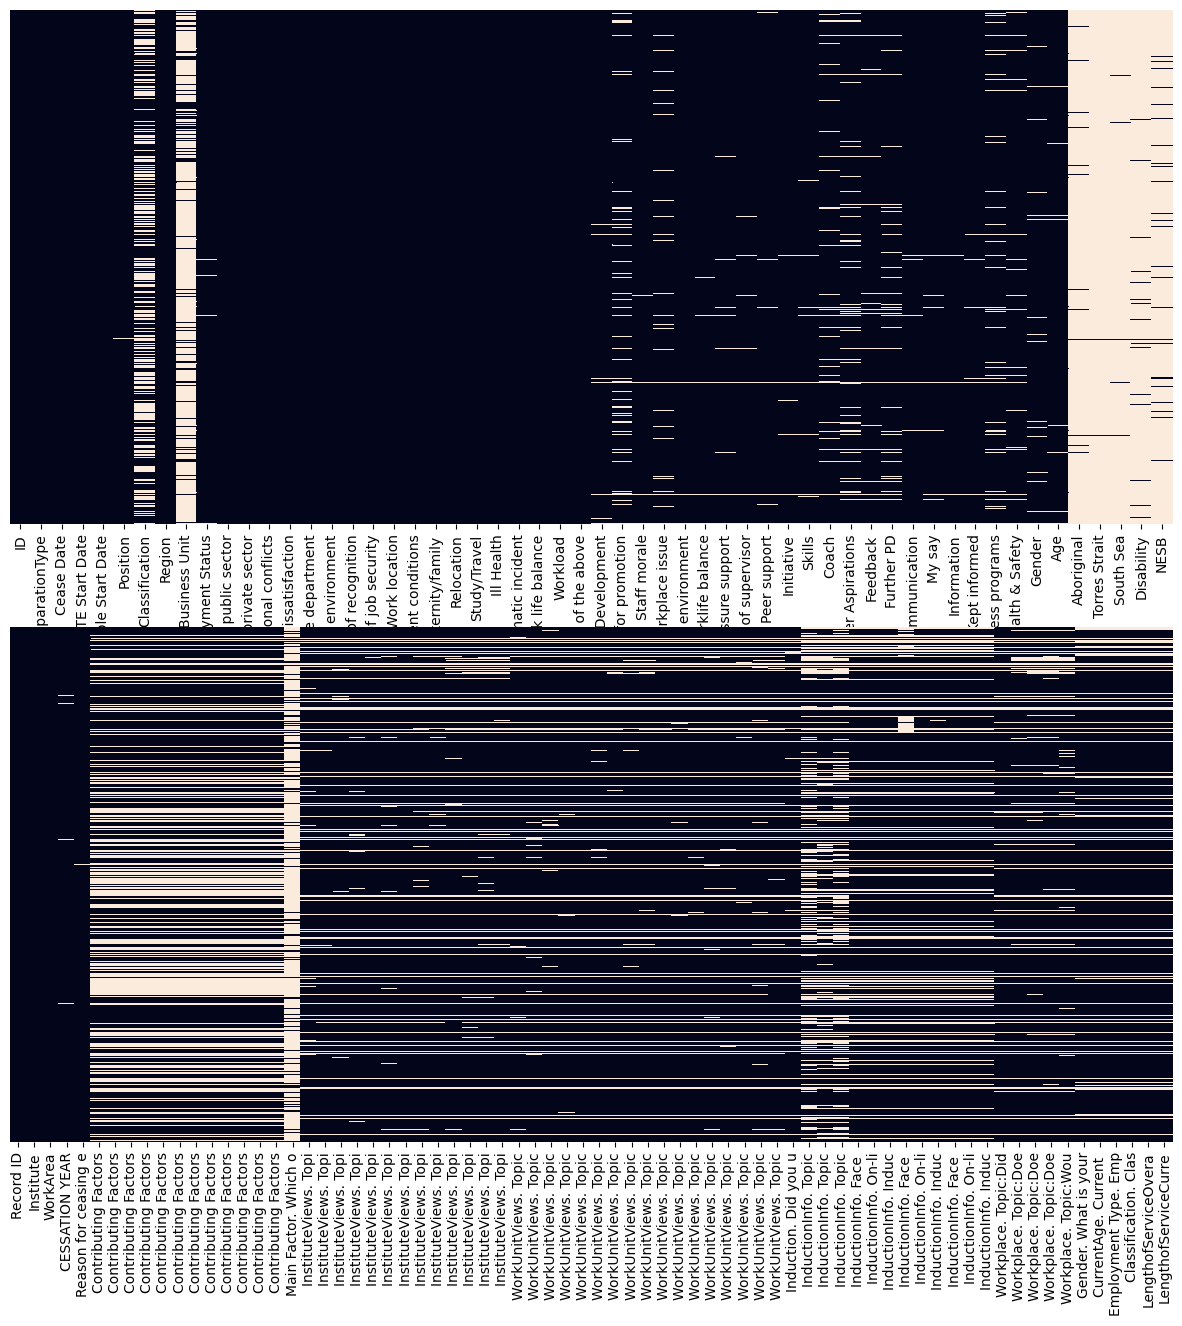

In [6]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

tafe_labels = [col[:20] for col in tafe_survey.columns]

sb.heatmap(dete_survey.isna(), ax=ax1, cbar=False, yticklabels=False)
sb.heatmap(tafe_survey.isna(), ax=ax2, cbar=False, yticklabels=False, xticklabels=tafe_labels)

### Note:
First, there are many unnecessary columns for our analysis. Second, there are columns which contain the same results but are labeled differently; like the ones about employee dissatisfaction. Lastly, some NaN entries are labeled as "Not Stated", which I will drop for the easier-to-process NaN:

In [7]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv", na_values="Not Stated")

In [8]:
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49])
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66])

In [9]:
print("DETE Survey Sample")
display(dete_survey_updated.head())
print("TAFE Survey Sample")
display(tafe_survey_updated.head())

DETE Survey Sample


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


TAFE Survey Sample


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
# Standardize column names in DETE survey

dete_survey_updated.columns = dete_survey_updated.columns\
    .str.lower()\
    .str.strip()\
    .str.replace(r"\s+", "_")
dete_survey_updated.rename(columns={"separationtype": "separation_type"}, inplace=True)

print(dete_survey_updated.columns)
display(dete_survey_updated.head())

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
# Standardize TAFE survey column names

rename = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separation_type',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated.rename(columns=rename, inplace=True)

print(tafe_survey_updated.columns)
display(tafe_survey_updated.head())

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Note:
The question we are trying to answer here is:

"Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?"

Let's analyze the various separation reasons listed:

<Figure size 600x400 with 0 Axes>

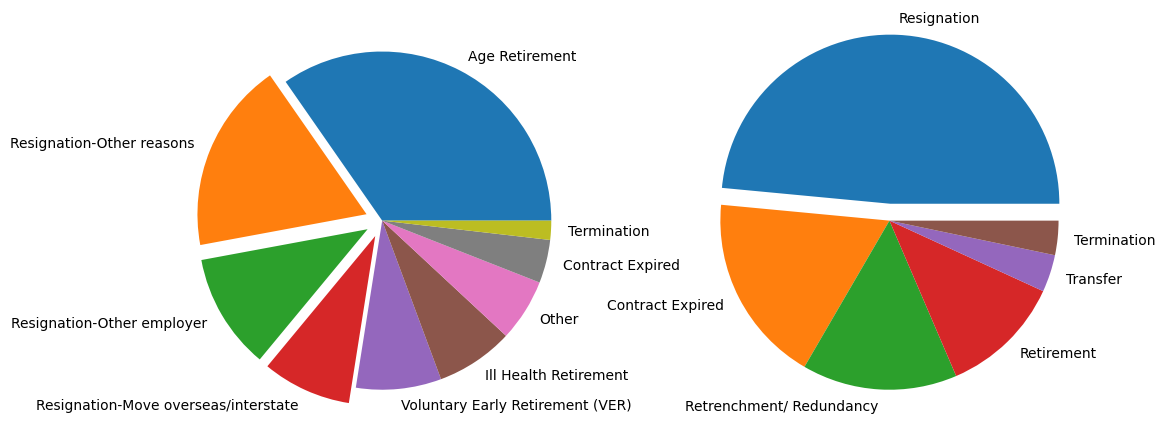

In [12]:
plt.clf()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

dete_survey_updated["separation_type"].value_counts()\
    .plot(kind="pie", ax=ax1, explode=[0, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0])
tafe_survey_updated["separation_type"].value_counts()\
    .plot(kind="pie", ax=ax2, explode=[0.1, 0, 0, 0, 0, 0])

ax1.set_ylabel("")
ax2.set_ylabel("")

plt.show()

In [13]:
dete_r = dete_survey_updated["separation_type"].str.contains(r"^Resignation", na=False)
tafe_r = tafe_survey_updated["separation_type"].str.contains(r"^Resignation", na=False)

dete_resignations = dete_survey_updated[dete_r]
tafe_resignations = tafe_survey_updated[tafe_r]

display(dete_resignations.head())
display(tafe_resignations.head())

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Note:
Next let's clean and verify the data on all those that resigned. First step is ensuring date consistencies:

In [14]:
print("DETE start dates:")
display(dete_resignations["dete_start_date"].value_counts())
print("DETE resignation dates:")
display(dete_resignations["cease_date"].value_counts())
print("TAFE resignation dates:")
display(tafe_resignations["cease_date"].value_counts())

DETE start dates:


2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

DETE resignation dates:


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

TAFE resignation dates:


2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [15]:
# DATE cease_date is in varied formats, will convert to float

dete_resignations["cease_date"] = dete_resignations["cease_date"]\
    .str.replace(r"([0-9]+/)?", "")\
    .astype(float)

<ipython-input-15-0e83c61bff84>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

<Figure size 600x400 with 0 Axes>

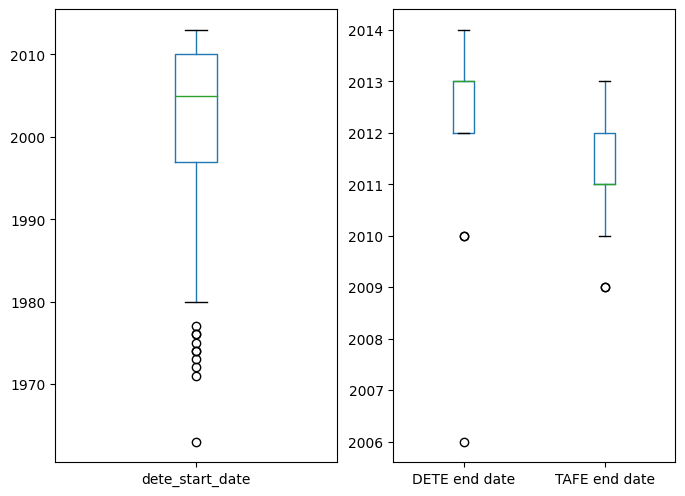

In [17]:
plt.clf()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

resignations = pd.concat(
    [dete_resignations["cease_date"], 
    tafe_resignations["cease_date"]],
    axis=1)
resignations.columns = ["DETE end date", "TAFE end date"]

dete_resignations["dete_start_date"].plot(kind="box", ax=ax1)
resignations.plot(kind="box", ax=ax2)

In [18]:
dete_resignations[dete_resignations["cease_date"]-dete_resignations["dete_start_date"]>40]

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
416,417,Resignation-Other reasons,2012.0,1963.0,1989.0,Teacher,Special Education,Metropolitan,NaN,Permanent Full-time,...,False,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
503,504,Resignation-Other reasons,2013.0,1972.0,2013.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,True,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
658,659,Resignation-Move overseas/interstate,2013.0,1971.0,2002.0,Teacher,Secondary,Metropolitan,NaN,Temporary Full-time,...,False,False,False,NaN,61 or older,NaN,NaN,NaN,NaN,NaN


### Note:
Observing the timelines, no values seem suspicious. Albeit there is no start date for TAFE survey, and only the <code>institute_service, role_service</code> columns, which seem to show employment period. Let's use that to generate a TAFE start date:

In [19]:
# Differences between role_service and institute_service columns?

service_diff = tafe_resignations["institute_service"]!=tafe_resignations["role_service"]
ineq_check = tafe_resignations["institute_service"]<tafe_resignations["role_service"]

display(tafe_resignations[service_diff].head())

# Institute service is length of employment for organization, role service is length in 
#   specific job position

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
16,6.341770e+17,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,6.341771e+17,Brisbane North Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,31 35,Permanent Full-time,Administration (AO),7-10,1-2
18,6.341779e+17,Brisbane North Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Create a "institute_service" column for DETE

dete_resignations["institute_service"] = dete_resignations["cease_date"]-dete_resignations["dete_start_date"]
display(dete_resignations.head())

<ipython-input-20-42f4f3788833>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


### Note:
Next let's look at the employees that stated their reason for resignation as "dissatisfaction". 

For the TAFE survey, two columns will be used: <code>Contributing Factors. Dissatisfaction, Contributing Factors. Job Dissatisfaction</code>

For the DETE survey, the following columns will be used: <code>job_dissatisfaction, dissatisfaction_with_the_department, physical_work_environment, lack_of_recognition, lack_of_job_security, work_location, employment_conditions, work_life_balance, workload</code>

A separate column <code>dissatisfied</code> will be used to track responses:

In [21]:
# Analyze and clean the values in the columns to be worked



print("TAFE survey dissatisfaction values")
display(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())
display(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

print("DETE survey dissatisfaction values")
display(dete_resignations["job_dissatisfaction"].value_counts())
display(dete_resignations["dissatisfaction_with_the_department"].value_counts())
display(dete_resignations["physical_work_environment"].value_counts())
display(dete_resignations["lack_of_recognition"].value_counts())
display(dete_resignations["lack_of_job_security"].value_counts())
display(dete_resignations["work_location"].value_counts())
display(dete_resignations["employment_conditions"].value_counts())
display(dete_resignations["work_life_balance"].value_counts())
display(dete_resignations["workload"].value_counts())

TAFE survey dissatisfaction values


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

DETE survey dissatisfaction values


False    270
True      41
Name: job_dissatisfaction, dtype: int64

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

False    305
True       6
Name: physical_work_environment, dtype: int64

False    278
True      33
Name: lack_of_recognition, dtype: int64

False    297
True      14
Name: lack_of_job_security, dtype: int64

False    293
True      18
Name: work_location, dtype: int64

False    288
True      23
Name: employment_conditions, dtype: int64

False    243
True      68
Name: work_life_balance, dtype: int64

False    284
True      27
Name: workload, dtype: int64

In [22]:
tafe_dis = ['Contributing Factors. Dissatisfaction', 
            'Contributing Factors. Job Dissatisfaction']
dete_dis = ["job_dissatisfaction",
            "dissatisfaction_with_the_department",
            "physical_work_environment",
            "lack_of_recognition",
            "lack_of_job_security",
            "work_location",
            "employment_conditions",
            "work_life_balance",
            "workload"]

def update_val(val):
    if pd.isna(val):
        return np.nan
    elif val=="-":
        return False
    else: 
        return True

In [23]:
tafe_resignations.loc[:, tafe_dis] = tafe_resignations.loc[:, tafe_dis].applymap(update_val)
tafe_resignations[tafe_dis].head()

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


In [24]:
tafe_resignations["dissatisfied"] = tafe_resignations.loc[:, tafe_dis].any(axis=1)
dete_resignations["dissatisfied"] = dete_resignations.loc[:, dete_dis].any(axis=1)

display(tafe_resignations.loc[:, tafe_dis + ["dissatisfied"]].head())
display(dete_resignations.loc[:, dete_dis + ["dissatisfied"]].head())

<ipython-input-24-231e852b1f3c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-231e852b1f3c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False


,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False


In [25]:
# Avoid any future problems with SettingWithCopyWarning
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

### Note:
Finally, the surveys need to be aggregated for combined analysis. The two DataFrames will be combined around the <code>institute_service</code> column. 

Need to make adjustments to the dataframes to differentiate between the two. Will also need to drop any values deemed unnecessary:

In [26]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [32]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined_up = combined.dropna(axis=1, thresh=500)

In [34]:
display(combined_up.head())
display(combined_up.tail())

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE
701,6.350730e+17,Resignation,2013.0,Administration (AO),Contract/casual,Female,26 30,3-4,False,TAFE


### Note:
All resignations have been aggregated and the columns with <500 non-null values were dropped for the sake of data accuracy (also many of the columns don't contribute to the focus of this analysis).

The next step is to categorize the employees based on "career stage", or how long they were with their respective institute. An article published by _businesswire_ compared various categories that affected employee engagement in a company, and found that length of service was the best indicator to use. Article found <a href=https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage>here</a>.

In [46]:
# Extract institute_service values
service = combined_up["institute_service"].astype(str).str.replace(r"[.]\d+", "").str.findall(r"\d+")

In [51]:
# Average the values and round to nearest integer, as some entries are ranges
def mean(val):
    if len(val)==0:
        return np.nan
    
    val = list(map(int, val))
    return int(sum(val)/len(val))

In [52]:
service = service.apply(mean)
service.tail()

696    5.0
697    1.0
698    NaN
699    5.0
701    3.0
Name: institute_service, dtype: float64

In [55]:
# Map service time to following service categories: 
#     New: Less than 3 years at a company
#     Experienced: 3-6 years at a company
#     Established: 7-10 years at a company
#     Veteran: 11 or more years at a company
def categorize(val):
    if pd.isnull(val):
        return "Unknown"
    elif val in range(0, 3):
        return "New"
    elif val in range(3, 7):
        return "Experienced"
    elif val in range(7, 11):
        return "Established"
    else:
        return "Veteran"

In [56]:
combined_up["service_cat"] = service.apply(categorize)
combined_up.head()

<ipython-input-56-1bdd44519aa5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,Established
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,Veteran
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,Experienced
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,Veteran
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,Experienced


### Note:
Employees have now been categorized in <code>service_cat</code> according to their service length.

Finally, let's look for any correlations between dissatisfaction and service category.

In [59]:
display(combined_up["dissatisfied"].value_counts())

print("Missing values: {}".format(combined_up["dissatisfied"].isna()))

False    411
True     240
Name: dissatisfied, dtype: int64

Missing values: 3      False
5      False
8      False
9      False
11     False
       ...  
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 651, dtype: bool


In [60]:
# Fill any missing values
combined_up["dissatisfied"].fillna(False, inplace=True)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
corr = pd.pivot_table(combined_up, values="dissatisfied", index="service_cat").sort_values(by="dissatisfied")
corr

,dissatisfied
service_cat,
New,0.295337
Unknown,0.295455
Experienced,0.343023
Veteran,0.485294
Established,0.516129


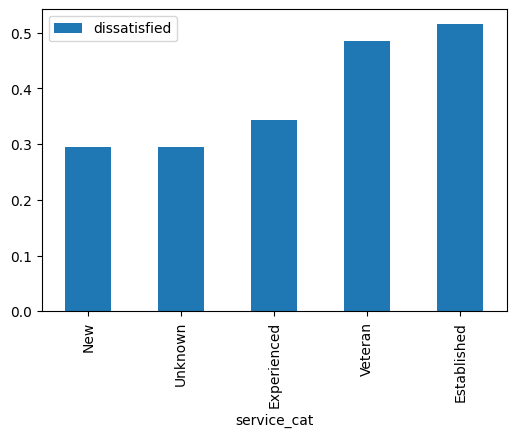

In [80]:
corr.plot(kind="bar")

### Conclusion:
The analysis shows a correlation between dissatisfaction and service period, but it's hard to say if the data says anything about this specific organization. As mentioned in the previously linked article, newer employees were more likely to leave an organization for better opportunities and probably have not enough exposure to the bad sides of the organization to force a resignation. On the other hand, it makes sense that more veteran of the employees would leave due to some form of dissatisfaction instead of just better career opportunities - they wouldn't have put up with the company for so long otherwise.